In [5]:
import numpy as np
import sys, os
import matplotlib.pyplot as plt

sys.path.append("..")
from qgbaroclinic.model.ocebaroclinicmodes import OceBaroclinicModes

In [6]:
# Define Ocean Baroclinic Modes object
obm = OceBaroclinicModes(x=[-160, -170], y=[40, 45])

In [7]:
# Extract OCEAN variables form NetCDF file.
# NOTE: "latitude", "longitude" are the dimension names in NetCDF file.
current_path = os.path.dirname(__vsc_ipynb_file__)
temp, sal, depth, lat = obm.read(
    os.path.join(current_path, "../data/reanalysis/"),
    "thetao",
    "so",
    "depth",
    "latitude",
    longitude=obm.domain["x"],
    latitude=obm.domain["y"],
)
mean_lat = np.mean(lat.values)

In [8]:
# Extract Bathymetry dataset and compute mean reagion depth
# NOTE: "lat", "lon" are the dimension names in NetCDF file.
elevation = obm.read(
    os.path.join(current_path, "../data/bathymetry/GEBCO_2023.nc"),
    "elevation",
    lat=obm.domain["y"],
    lon=obm.domain["x"],
)
mean_depth = np.abs(np.nanmean(elevation))

In [9]:
"region mean depth", mean_depth, "region mean lat", mean_lat

('region mean depth', 5565.421890892672, 'region mean lat', 42.500004)

In [14]:
# Compute pot density (you should use potential temperature!)
pot_density = obm.potential_density(temp, sal)
mean_pot_density = np.nanmean(pot_density, axis = (0,2,3))

/var/folders/b8/f5ydwtrd2d1ftwhpf6_k2k440000gn/T/ipykernel_25658/4137347743.py:3: RuntimeWarning: Mean of empty slice
  mean_pot_density = np.nanmean(pot_density, axis = (0,2,3))


In [11]:
obm(mean_pot_density, depth.values, mean_lat, mean_depth)

In [15]:
# The output result is stored as attributes
rossby_rad = obm.rossby_rad
vert_structfunc = obm.vert_structfunc
print(rossby_rad)

[3.20656582e+09 2.48053331e+04 1.23029927e+04 8.16690603e+03]


In [16]:
def coriolis_param(mean_lat: float) -> float:
    """
    Compute Coriolis parameter given the region mean latitude.
    """

    # earth angular velocity (1/s)
    earth_angvel = 7.29 * 1e-05
    # coriolis parameter (1/s)
    coriolis_param = 2 * earth_angvel * np.sin(mean_lat * np.pi / 180)
    return coriolis_param

In [19]:
# reminder
omega = 1.0
coriolis_parameter = coriolis_param(mean_lat)
denominator = np.sqrt(omega**2 - coriolis_parameter**2)
horizontal_wavelength = rossby_rad * (1/denominator)

In [23]:
"horizontal wavelength", horizontal_wavelength

('horizontal wavelength',
 array([3.20656584e+09, 2.48053332e+04, 1.23029927e+04, 8.16690607e+03]))

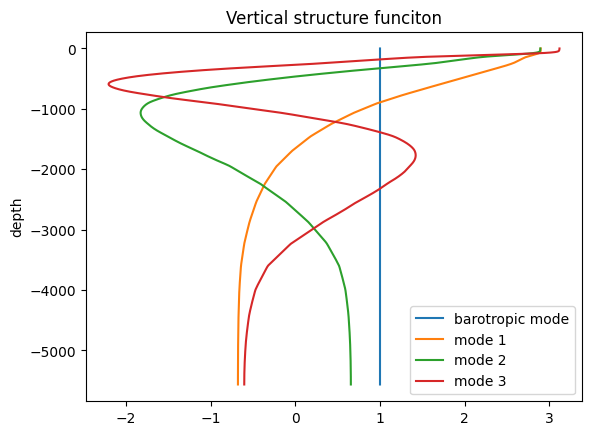

In [13]:
plt.figure(1)
plt.plot(vert_structfunc, - obm.depth)
plt.title("Vertical structure funciton")
plt.ylabel("depth")
plt.legend(["barotropic mode", "mode 1", "mode 2", "mode 3", "mode 4"])
plt.show()
plt.close()
